In [2]:
# Importing modules
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
import pandas as pd
import os
import openai 

os.chdir('../../..')

# Read data into papers. Please change directory to re-run
papers = pd.read_csv('C:/Users/PC/Downloads/lab_sessions/lab6/data_expanded.csv')

# Print head
papers.head()




,NCT Number,Study Title,Brief Summary,Study Results,Conditions,Primary Outcome Measures,Secondary Outcome Measures,Other Outcome Measures
0,NCT00080951,"Irinotecan, Fluorouracil, Leucovorin, and Oxal...","RATIONALE: Drugs used in chemotherapy, such as...",NO,Colorectal Cancer,"tumor response rate, Up to 5 years","time to progression, Up to 5 years|overall sur...",NaN
1,NCT02495051,"Esophageal Atresia: Metaplasia, Barrett",The frequency of Barrett's esophagus (BE) has ...,NO,"Gastroesophageal Reflux|Esophagus, Barrett",presence of gastric and / or intestinal metapl...,presence of esophagitis or anomalies at the an...,NaN
2,NCT00023751,Surgery With or Without Chemotherapy and Radia...,RATIONALE: Drugs used in chemotherapy use diff...,NO,Colorectal Cancer,"disease-free survival, Up to 5 years","overall survival, Up to 5 years|colostomy-free...",NaN
3,NCT00017212,DX-8951f in Treating Patients With Metastatic ...,RATIONALE: Drugs used in chemotherapy use diff...,NO,Esophageal Cancer|Gastric Cancer,NaN,NaN,NaN
4,NCT01288612,Comparative Effectiveness of Endoscopic Assess...,The hypothesis of this study was that the comp...,YES,Barrett's Esophagus,Percentage of Subjects Who Agreed to Participa...,"Rate of Successful Intubation, The rate of suc...",NaN


In [3]:
# Remove the columns
papers = papers.drop(columns=['Study Results','Other Outcome Measures'], axis=1)

# Print out the first rows of papers
papers.head()

,NCT Number,Study Title,Brief Summary,Conditions,Primary Outcome Measures,Secondary Outcome Measures
0,NCT00080951,"Irinotecan, Fluorouracil, Leucovorin, and Oxal...","RATIONALE: Drugs used in chemotherapy, such as...",Colorectal Cancer,"tumor response rate, Up to 5 years","time to progression, Up to 5 years|overall sur..."
1,NCT02495051,"Esophageal Atresia: Metaplasia, Barrett",The frequency of Barrett's esophagus (BE) has ...,"Gastroesophageal Reflux|Esophagus, Barrett",presence of gastric and / or intestinal metapl...,presence of esophagitis or anomalies at the an...
2,NCT00023751,Surgery With or Without Chemotherapy and Radia...,RATIONALE: Drugs used in chemotherapy use diff...,Colorectal Cancer,"disease-free survival, Up to 5 years","overall survival, Up to 5 years|colostomy-free..."
3,NCT00017212,DX-8951f in Treating Patients With Metastatic ...,RATIONALE: Drugs used in chemotherapy use diff...,Esophageal Cancer|Gastric Cancer,NaN,NaN
4,NCT01288612,Comparative Effectiveness of Endoscopic Assess...,The hypothesis of this study was that the comp...,Barrett's Esophagus,Percentage of Subjects Who Agreed to Participa...,"Rate of Successful Intubation, The rate of suc..."


In [4]:
papers2 = pd.DataFrame()


In [5]:
# Load the regular expression library this process is for data cleaning 
import re

# Fill NA values and ensure all values are treated as strings
papers2['1st_Outcomes'] = papers['Primary Outcome Measures'].fillna('').astype(str)
papers2['2nd_Outcomes'] = papers['Secondary Outcome Measures'].fillna('').astype(str)
papers2['Condition'] = papers['Conditions'].fillna('').astype(str)
papers2['Summary'] = papers['Brief Summary'].fillna('').astype(str)
papers2['Titles'] = papers['Study Title'].fillna('').astype(str)

# Remove punctuation
papers2['1st_Outcomes'] = papers2['1st_Outcomes'].map(lambda x: re.sub('[,\.!?]', '', x))
papers2['2nd_Outcomes'] = papers2['2nd_Outcomes'].map(lambda x: re.sub('[,\.!?]', '', x))
papers2['Condition'] = papers2['Condition'].map(lambda x: re.sub('[,\.!?]', '', x))
papers2['Summary'] = papers2['Summary'].map(lambda x: re.sub('[,\.!?]', '', x))
papers2['Titles'] = papers2['Titles'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers2['1st_Outcomes'] = papers2['1st_Outcomes'].map(lambda x: x.lower())
papers2['2nd_Outcomes'] = papers2['2nd_Outcomes'].map(lambda x: x.lower())
papers2['Condition'] = papers2['Condition'].map(lambda x: x.lower())
papers2['Summary'] = papers2['Summary'].map(lambda x: x.lower())
papers2['Titles'] = papers2['Titles'].map(lambda x: x.lower())

In [6]:
papers2.head()

,1st_Outcomes,2nd_Outcomes,Condition,Summary,Titles
0,tumor response rate up to 5 years,time to progression up to 5 years|overall surv...,colorectal cancer,rationale: drugs used in chemotherapy such as ...,irinotecan fluorouracil leucovorin and oxalipl...
1,presence of gastric and / or intestinal metapl...,presence of esophagitis or anomalies at the an...,gastroesophageal reflux|esophagus barrett,the frequency of barrett's esophagus (be) has ...,esophageal atresia: metaplasia barrett
2,disease-free survival up to 5 years,overall survival up to 5 years|colostomy-free ...,colorectal cancer,rationale: drugs used in chemotherapy use diff...,surgery with or without chemotherapy and radia...
3,,,esophageal cancer|gastric cancer,rationale: drugs used in chemotherapy use diff...,dx-8951f in treating patients with metastatic ...
4,percentage of subjects who agreed to participa...,rate of successful intubation the rate of succ...,barrett's esophagus,the hypothesis of this study was that the comp...,comparative effectiveness of endoscopic assess...


In [7]:
len(papers2['Summary'])

4763

In [8]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a given text
def lemmatize_stemming(text):
    return lemmatizer.lemmatize(text)

# Function to preprocess a given text
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [9]:
doc_sample = papers2.loc[5, 'Summary']

print('original Summary: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized Summary: ')
print(preprocess(doc_sample))

original Summary: 
['the', 'purpose', 'of', 'this', 'study', 'is', 'to', 'evaluate', 'the', 'defecatory', 'function', 'when', 'nerve', 'fibers', 'around', 'the', 'inferior', 'mesenteric', 'artery(ima)', 'and', 'left', 'colic', 'artery(lca)', 'are', 'preserved(so', 'called', 'low', 'ligation', ')', 'or', 'not(high', 'ligation)', 'in', 'the', 'rectosigmoid', 'and', 'rectal', 'cancer', 'surgery']


 tokenized and lemmatized Summary: 
['purpose', 'study', 'evaluate', 'defecatory', 'function', 'nerve', 'fiber', 'inferior', 'mesenteric', 'artery', 'left', 'colic', 'artery', 'preserved', 'called', 'ligation', 'high', 'ligation', 'rectosigmoid', 'rectal', 'cancer', 'surgery']


In [10]:
#processes and cleans all data columns
processed_summary=papers2['Summary'].map(preprocess)
processed_1_outcome=papers2['1st_Outcomes'].map(preprocess)
processed_2_outcome=papers2['2nd_Outcomes'].map(preprocess)
processed_titles=papers2['Titles'].map(preprocess)

In [11]:
processed_summary

0       [rationale, drug, chemotherapy, irinotecan, fl...
1       [frequency, barrett, esophagus, increased, adu...
2       [rationale, drug, chemotherapy, different, way...
3       [rationale, drug, chemotherapy, different, way...
4       [hypothesis, study, comparative, effectiveness...
                              ...                        
4758    [clinical, trial, hypothesize, microbiota, bac...
4759    [nonpolypoid, colorectal, neoplasm, crns, rela...
4760    [chemotherapy, given, standard, treat, cancer,...
4761    [single, study, ass, resection, rate, liver, m...
4762    [multicenter, phase, randomized, active, contr...
Name: Summary, Length: 4763, dtype: object

In [12]:
print('----Start of Dictionary for LDA ----')
# Create a dictionary from the processed_summary
dictionary_summary = gensim.corpora.Dictionary(processed_summary)

# Initialize a count variable
count = 0
# Filter the dictionary by removing extremes
dictionary_summary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Iterate over the items in the dictionary
for k, v in dictionary_summary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        


---- this is summaries----
0 cell
1 chemotherapy
2 colorectal
3 combination
4 combining
5 different
6 dividing
7 drug
8 effectiveness
9 fluorouracil
10 growing


In [13]:
# Create a Bag-of-Words (BoW) representation of the summary corpus
bow_corpus_summary = [dictionary_summary.doc2bow(doc) for doc in processed_summary]

In [14]:
# Select the Bag-of-Words representation for a specific document (index 5)
bow_doc = bow_corpus_summary[5]
# Iterate over each item in the Bag-of-Words representation
for i in range(len(bow_doc)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc[i][0], 
                                               dictionary_summary[bow_doc[i][0]], 
bow_doc[i][1]))

Word 18 ("purpose") appears 1 time.
Word 72 ("high") appears 1 time.
Word 76 ("rectal") appears 1 time.
Word 79 ("surgery") appears 1 time.
Word 87 ("artery") appears 2 time.
Word 88 ("called") appears 1 time.
Word 89 ("evaluate") appears 1 time.
Word 90 ("function") appears 1 time.
Word 91 ("inferior") appears 1 time.
Word 92 ("left") appears 1 time.
Word 93 ("nerve") appears 1 time.


In [15]:
from gensim import corpora, models
# Create a TF-IDF model from the Bag-of-Words summary corpus
tfidf_summary = models.TfidfModel(bow_corpus_summary)

# Apply TF-IDF transformation to the entire summary corpus
corpus_tfidf_summary = tfidf_summary[bow_corpus_summary]

# Iterate over the transformed corpus and print the first document
from pprint import pprint
for doc in corpus_tfidf_summary:
    pprint(doc)
    break

[(0, 0.24574561295855715),
 (1, 0.21005222631406456),
 (2, 0.08230301124716685),
 (3, 0.1399743890823888),
 (4, 0.24529621077294597),
 (5, 0.15061463590661664),
 (6, 0.18791658243231862),
 (7, 0.2868533765348094),
 (8, 0.17126347178031678),
 (9, 0.21042996357535607),
 (10, 0.21447957819590424),
 (11, 0.20683884403617328),
 (12, 0.19656106276617302),
 (13, 0.24322877703853832),
 (14, 0.19211372927681555),
 (15, 0.12748362371199942),
 (16, 0.19526312422344508),
 (17, 0.10664363605677096),
 (18, 0.08943013297696623),
 (19, 0.15870067707792096),
 (20, 0.339754247664755),
 (21, 0.13249059890840834),
 (22, 0.15204299692560141),
 (23, 0.09481311337937268),
 (24, 0.2063853617337529),
 (25, 0.17843864820315505),
 (26, 0.18194302836847615)]


In [16]:
# Train an LDA (Latent Dirichlet Allocation) model on the Bag-of-Words summary corpus
lda_model1 = gensim.models.LdaMulticore(bow_corpus_summary, num_topics=80, id2word=dictionary_summary, passes=2, workers=2)

# Initialize an empty list to store the LDA topics
lda_list=[]


# Iterate over the topics in the LDA model and print them
for idx, topic in lda_model1.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    topic1_string='Topic: {} \nWords: {}'.format(idx, topic)
    lda_list.append(topic1_string)

Topic: 0 
Words: 0.032*"treatment" + 0.014*"gastric" + 0.012*"response" + 0.012*"tumor" + 0.012*"chemotherapy" + 0.011*"clinical" + 0.010*"advanced" + 0.010*"colorectal" + 0.008*"combination" + 0.008*"primary"
Topic: 1 
Words: 0.023*"surgery" + 0.019*"group" + 0.018*"treatment" + 0.014*"colorectal" + 0.014*"respiratory" + 0.014*"pulmonary" + 0.014*"compare" + 0.013*"postoperative" + 0.012*"performed" + 0.012*"participant"
Topic: 2 
Words: 0.018*"treatment" + 0.017*"gastric" + 0.015*"screening" + 0.014*"disease" + 0.011*"immune" + 0.010*"objective" + 0.010*"tumor" + 0.010*"related" + 0.009*"clinical" + 0.009*"great"
Topic: 3 
Words: 0.052*"care" + 0.036*"palliative" + 0.029*"week" + 0.027*"treatment" + 0.018*"placebo" + 0.015*"randomized" + 0.014*"receive" + 0.013*"standard" + 0.012*"visit" + 0.011*"oral"
Topic: 4 
Words: 0.036*"cell" + 0.035*"tumor" + 0.027*"stage" + 0.018*"treatment" + 0.018*"colorectal" + 0.010*"growth" + 0.010*"test" + 0.009*"associated" + 0.009*"blood" + 0.008*"the

In [17]:
# Train an LDA (Latent Dirichlet Allocation) model on the TF-IDF summary corpus
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_summary, num_topics=80, id2word=dictionary_summary, passes=2, workers=4)

# Initialize an empty list to store the LDA topics for the TF-IDF version
tfidf_list=[]

# Iterate over the topics in the LDA model and print them
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    topic_string='Topic: {} \nWords: {}'.format(idx, topic)
    tfidf_list.append(topic_string)
    

Topic: 0 
Words: 0.014*"laparoscopic" + 0.012*"surgery" + 0.010*"gastric" + 0.009*"comparing" + 0.009*"lymph" + 0.008*"recovery" + 0.008*"versus" + 0.008*"node" + 0.008*"type" + 0.008*"anal"
Topic: 1 
Words: 0.019*"safe" + 0.017*"gastric" + 0.016*"docetaxel" + 0.015*"cisplatin" + 0.013*"malignant" + 0.011*"oral" + 0.011*"caused" + 0.010*"small" + 0.010*"capecitabine" + 0.010*"effective"
Topic: 2 
Words: 0.038*"familial" + 0.036*"adenomatous" + 0.030*"polyposis" + 0.021*"monitor" + 0.017*"fluid" + 0.015*"observed" + 0.010*"surgery" + 0.009*"bevacizumab" + 0.008*"giving" + 0.008*"randomized"
Topic: 3 
Words: 0.022*"week" + 0.021*"administered" + 0.021*"cycle" + 0.021*"xeloda" + 0.016*"anticipated" + 0.014*"safety" + 0.014*"day" + 0.014*"time" + 0.014*"participant" + 0.012*"capecitabine"
Topic: 4 
Words: 0.041*"ramucirumab" + 0.021*"reconstruction" + 0.017*"clinic" + 0.015*"endpoint" + 0.012*"long" + 0.012*"response" + 0.011*"combined" + 0.011*"according" + 0.010*"standard" + 0.010*"regim

In [43]:
# Iterate over the topics and for the first document in the summary corpus BOW model
for index, score in sorted(lda_model1[bow_corpus_summary[0]], key=lambda tup: -1*tup[1]):
    print("\nTopic: {}".format( lda_model1.print_topic(index, 10)))
    break


Topic: 0.062*"chemotherapy" + 0.039*"tumor" + 0.033*"stop" + 0.033*"cell" + 0.028*"drug" + 0.025*"therapy" + 0.022*"radiation" + 0.020*"trial" + 0.020*"treating" + 0.020*"purpose"


In [44]:
# Iterate over the topics for the first document in the summary corpus TF-IDF model
for index, score in sorted(lda_model_tfidf[corpus_tfidf_summary[0]], key=lambda tup: -1*tup[1]):
    print("\nTopic: {}".format(lda_model1.print_topic(index, 10)))


Topic: 0.026*"colorectal" + 0.022*"combination" + 0.017*"advanced" + 0.016*"tumor" + 0.015*"chemotherapy" + 0.014*"metastatic" + 0.013*"colonoscopy" + 0.013*"cell" + 0.012*"trial" + 0.012*"paclitaxel"


In [45]:
# Set the OpenAI API key make sure to use your own key, or the notebook will not work
openai.api_key = ################################
import requests
# Create an empty list to store the scores
list_of_scores=[]
# Iterate over the topics and scores for the first document in the summary corpus
for index, score in sorted(lda_model1[bow_corpus_summary[0]], key=lambda tup: -1*tup[1]):
# Append the topic string to the list of scores
    list_of_scores.append(lda_model1.print_topic(index))
    break
    
# Define the user input query for the LLM 
input1=' give all of the measurements found without scores for the topics below: '

# Define the URL for the OpenAI API
URL = "https://api.openai.com/v1/chat/completions"

# Construct the complete query by joining the list of scores
query=(input1 + ', '.join(list_of_scores))

# Construct the payload for the API request
payload = {
"model": "gpt-3.5-turbo-16k",
"messages": [{'role': 'system','content':'you are a translation system. Your role is to get this type of input (Topic: 0.038* tumor  + 0.027*cell + 0.015*drug + 0.014*colorectal + 0.014*treatment + 0.013*growth + 0.013*screening + 0.010*bevacizumab + 0.009*chemotherapy + 0.009*therapy and reformat it into this type:[measurement of tumor growth, measurement of cell response, measurement of drug efficacy, measurement of colorectal treatment, measurement of screening effectiveness, measurement of bevacizumab impact, measurement of chemotherapy effectiveness, measurement of therapy outcomes]'},
            {"role": "user", "content": query}],
"temperature" : 0.8,
"top_p":0.87,
"n" : 1,
"stream": False,
"presence_penalty":0.03,
"frequency_penalty":0.5,
}

headers = {
"Content-Type": "application/json",
"Authorization": f"Bearer {openai.api_key}"
}
# Send a POST request to the OpenAI API
response = requests.post(URL, headers=headers, json=payload, stream=False)

# Parse the response JSON
response_json = response.json()

# Extract the chatbot response
chatbot_response = response_json['choices'][0]['message']['content']

# Split the chatbot response into a list of individual measurements
measurements_list = chatbot_response.strip().split('\n')

#Print the list of measurements
for measurement in measurements_list:
    print(measurement)

[measurement of chemotherapy effectiveness, measurement of tumor response, measurement of cell response, measurement of drug efficacy, measurement of therapy outcomes, measurement of radiation impact, measurement of trial outcomes]


In [27]:
# Set the OpenAI API key make sure to use your own key, or the notebook will not work
openai.api_key = ################################
import requests

# Create empty lists to store the scores and measurements
list_of_scores_tfidf=[]
list_all_measurements_tfidf=[]


for z in tfidf_list:
    list_of_scores_tfidf=z
 # Define the user input query for TF-IDF
    input_tfidf=' give all of the measurements found without scores for the topics below: '
    URL_tfidf = "https://api.openai.com/v1/chat/completions"
    query_tfidf=(input_tfidf + ', '.join(list_of_scores_tfidf))
    payload_tfidf = {
    "model": "gpt-3.5-turbo-16k",
    "messages": [{'role': 'system','content':'you are a translation system. Your role is to get this type of input (Topic: 0.038* tumor  + 0.027*cell + 0.015*drug + 0.014*colorectal + 0.014*treatment + 0.013*growth + 0.013*screening + 0.010*bevacizumab + 0.009*chemotherapy + 0.009*therapy and reformat it into this type:[measurement of tumor growth, measurement of cell response, measurement of drug efficacy, measurement of colorectal treatment, measurement of screening effectiveness, measurement of bevacizumab impact, measurement of chemotherapy effectiveness, measurement of therapy outcomes]'},
                {"role": "user", "content": query_tfidf}],
    "temperature" : 0.8,
    "top_p":0.87,
    "n" : 1,
    "stream": False,
    "presence_penalty":0.03,
    "frequency_penalty":0.5,
    }

    headers_tfidf = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {openai.api_key}"
    }
    try:
         # Send a POST request to the OpenAI API for TF-IDF and get the response
        response_tfidf = requests.post(URL_tfidf, headers=headers_tfidf, json=payload_tfidf, stream=False)
        response_json_tfidf = response_tfidf.json()
        chatbot_response_tfidf = response_json_tfidf['choices'][0]['message']['content']
        # Split the chatbot response into a list of individual measurements
        measurements_list_tfidf = chatbot_response_tfidf.strip().split('\n')
        print(chatbot_response_tfidf.strip().split('\n'))
        list_all_measurements_tfidf.append((chatbot_response_tfidf.strip().split('\n')))
    except:
        continue
#Print the list of measurements
for measurement in measurements_list_tfidf:
    print(measurement)

['[measurement of laparoscopic surgery, measurement of gastric surgery, measurement of comparing lymph recovery, measurement of versus node type, measurement of anal recovery]']
['[measurement of safe use, measurement of gastric treatment, measurement of docetaxel treatment, measurement of cisplatin treatment, measurement of malignancy, measurement of oral treatment, measurement of causation, measurement of small size, measurement of capecitabine treatment, measurement of effectiveness]']
['measurement of familial adenomatous polyposis', 'measurement of monitor', 'measurement of fluid', 'measurement of observed', 'measurement of surgery', 'measurement of bevacizumab', 'measurement of giving', 'measurement of randomized']
['measurement of tumor growth, measurement of cell response, measurement of drug efficacy, measurement of colorectal treatment, measurement of screening effectiveness, measurement of bevacizumab impact, measurement of chemotherapy effectiveness, measurement of therapy 

['measurement of tumor growth, measurement of cell response, measurement of drug efficacy, measurement of colorectal treatment, measurement of screening effectiveness, measurement of bevacizumab impact, measurement of chemotherapy effectiveness, measurement of therapy outcomes']
['[measurement of everolimus impact, measurement of navigator effectiveness, measurement of band impact, measurement of care effectiveness, measurement of narrow outcomes, measurement of white outcomes, measurement of financial outcomes, measurement of project outcomes, measurement of disparity outcomes, measurement of endomicroscopy]']
['measurement of bowel preparation', 'measurement of plan', 'measurement of volume', 'measurement of histology', 'measurement of versus', 'measurement of colonoscopy', 'measurement of caused', 'measurement of self', 'measurement of perioperative']
['[measurement of adenoma detection, measurement of robotic detection, measurement of under went detection, measurement of laparoscop

['measurement of intervention, measurement of screening, measurement of outcome, measurement of bowel, measurement of colonoscopy, measurement of aim, measurement of caregiver, measurement of primary, measurement of telephone, measurement of related']
['measurement of tumor growth', 'measurement of cell response', 'measurement of drug efficacy', 'measurement of colorectal treatment', 'measurement of screening effectiveness', 'measurement of bevacizumab impact', 'measurement of chemotherapy effectiveness', 'measurement of therapy outcomes']
['[measurement of postoperative surgery, measurement of abdominal anesthesia, measurement of pain, measurement of complication, measurement of expressing, measurement of protocol, measurement of gastric, measurement of delivered]']
['measurement of adenocarcinoma', 'measurement of squamous', 'measurement of pembrolizumab', 'measurement of extension', 'measurement of bevacizumab', 'measurement of single', 'measurement of elderly', 'measurement of deat

In [23]:
openai.api_key = ################################
import requests

list_of_scores_lda=[]
list_all_measurements_lda=[]

for x in lda_list:
    list_of_scores_lda=x

    input_lda=' give all of the measurements found without scores for the topics below: '
    URL_lda = "https://api.openai.com/v1/chat/completions"
    query_lda=(input1 + ', '.join(list_of_scores_lda))
    payload_lda = {
    "model": "gpt-3.5-turbo-16k",
    "messages": [{'role': 'system','content':'you are a translation system. Your role is to get this type of input (Topic: 0.038* tumor  + 0.027*cell + 0.015*drug + 0.014*colorectal + 0.014*treatment + 0.013*growth + 0.013*screening + 0.010*bevacizumab + 0.009*chemotherapy + 0.009*therapy and reformat it into this type:[measurement of tumor growth, measurement of cell response, measurement of drug efficacy, measurement of colorectal treatment, measurement of screening effectiveness, measurement of bevacizumab impact, measurement of chemotherapy effectiveness, measurement of therapy outcomes]'},
            {"role": "user", "content": query_lda}],
    "temperature" : 0.8,
    "top_p":0.87,
    "n" : 1,
    "stream": False,
    "presence_penalty":0.03,
    "frequency_penalty":0.5,
    }

    headers_lda = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {openai.api_key}"
    }
    try:
        response_lda = requests.post(URL_lda, headers=headers_lda, json=payload_lda, stream=False)
        response_json_lda = response_lda.json()
        chatbot_response_lda = response_json_lda['choices'][0]['message']['content']
        # Split the chatbot response into a list of individual measurements
        measurements_list_lda = chatbot_response_lda.strip().split('\n')
        print(chatbot_response_lda.strip().split('\n'))
        list_all_measurements_lda.append((chatbot_response_lda.strip().split('\n'))),
    except:
        continue
#Print the list of measurements
for measurement in measurements_list_lda:
    print(measurement)

['[measurement of treatment, measurement of gastric, measurement of response, measurement of tumor, measurement of chemotherapy, measurement of clinical, measurement of advanced, measurement of colorectal, measurement of combination, measurement of primary]']
['measurement of surgery, measurement of group, measurement of treatment, measurement of colorectal, measurement of respiratory, measurement of pulmonary, measurement of compare, measurement of postoperative, measurement of performed, measurement of participant']
['[measurement of treatment, measurement of gastric, measurement of screening, measurement of disease, measurement of immune, measurement of objective, measurement of tumor, measurement of related, measurement of clinical, measurement of great]']
['measurement of tumor growth, measurement of palliative care, measurement of weekly treatment, measurement of placebo, measurement of randomized, measurement of receive, measurement of standard, measurement of visit, measurement

['measurement of therapy', 'measurement of survival', 'measurement of rate', 'measurement of resection', 'measurement of treatment', 'measurement of surgical', 'measurement of year', 'measurement of efficacy', 'measurement of primary']
['measurement of colorectal', 'measurement of blood', 'measurement of screening', 'measurement of gene', 'measurement of tumor', 'measurement of mutation', 'measurement of sample', 'measurement of cell', 'measurement of drug', 'measurement of laboratory']
['[measurement of therapy, measurement of pemetrexed, measurement of gastric, measurement of factor, measurement of cisplatin, measurement of chemoradiation, measurement of tumor, measurement of response, measurement of mucositis, measurement of oral]']
['measurement of imatinib efficacy', 'measurement of tumor growth', 'measurement of GIST treatment', 'measurement of colonoscopy effectiveness', 'measurement of high treatment outcomes', 'measurement of month therapy outcomes', 'measurement of cell respo

['[measurement of participant combination, measurement of screening, measurement of receive, measurement of safety, measurement of survey, measurement of pembrolizumab, measurement of purpose, measurement of efficacy, measurement of week]']
['[measurement of screening effectiveness, measurement of intervention, measurement of rate, measurement of care, measurement of health, measurement of group, measurement of clinic, measurement of colorectal, measurement of community, measurement of physician]']
['[measurement of lesion, measurement of colonoscope, measurement of device, measurement of greater, measurement of therapeutic, measurement of performed, measurement of histological, measurement of physician, measurement of effect, measurement of polyp]']
['measurement of program effectiveness, measurement of colorectal treatment, measurement of screening effectiveness, measurement of group outcomes, measurement of test results, measurement of individual outcomes, measurement of life outcom

In [28]:
import ast

def clean_item(item):
    # Remove square brackets, quotes, and extra white spaces
    item = item.replace('[', '').replace(']', '').replace('\'', '').strip()

    # If the item contains commas, it was actually a list in string format
    # Split it into a real list
    if ',' in item:
        item = item.split(', ')
        
    return item

# Flatten the list and clean the items
flat_list_lda = [clean_item(item) for sublist in list_all_measurements_lda for item in sublist]
flat_list_tfidf=[clean_item(item) for sublist in list_all_measurements_tfidf for item in sublist]
# In case there are any sublists remaining (from the string lists), flatten again
flat_list_lda = [item for sublist in flat_list_lda for item in (sublist if isinstance(sublist, list) else [sublist])]
flat_list_tfidf = [item for sublist in flat_list_tfidf for item in (sublist if isinstance(sublist, list) else [sublist])]
# Convert to set to remove duplicates, and back to list
unique_flat_list_lda = list(set(flat_list_lda))
unique_flat_list_tfidf = list(set(flat_list_tfidf))
print('this is lda/bow set for all gotten measruements also known as classes for our case')
print(unique_flat_list_lda)
print('this is tfidf set for all gotten measruements also known as classes for our case')
print(unique_flat_list_tfidf)

this is lda/bow set for all gotten measruements also known as classes for our case
['measurement of gastric diagnosis', 'measurement of effect', 'measurement of pain', 'measurement of cost', 'measurement of colonic', 'measurement of symptom', 'advanced', 'measurement of rectal', 'measurement of device', 'measurement of time', 'measurement of intervention outcomes', 'measurement of effective', 'measurement of regorafenib', 'measurement of subject response', 'measurement of visit', 'measurement of western treatment', 'measurement of related', 'measurement of method', 'measurement of life outcomes', 'measurement of tumor growth', 'measurement of optical', 'measurement of capecitabine effectiveness', 'measurement of cell trial', 'measurement of colon size', 'measurement of safety', 'measurement of test', 'measurement of surgery rate', 'measurement of mcr', 'measurement of recommendation', 'measurement of treated', 'measurement of gastric tumor growth', 'response', 'measurement of cohort', 

In [29]:
#every outputted class/measurement for the TF-IDF model
for elem in unique_flat_list_tfidf:
    print (elem)

measurement of develop
measurement of cost
measurement of colonic
measurement of relapsed
measurement of rectal
measurement of sequence
measurement of tolerated combination
measurement of blood response
measurement of white outcomes
measurement of participant safety
measurement of capecitabine effectiveness
measurement of optical
measurement of flow
measurement of histology
measurement of polypectomy
measurement of session
measurement of investigate
measurement of detecting half oncology
measurement of colorectal treatment
measurement of single
measurement of gastric excision
measurement of protocol
measurement of recent
measurement of developing cancer
measurement of screening effectiveness
measurement of healthy
measurement of modulated
measurement of placebo
measurement of mutation effects
measurement of goal achievement
measurement of esophageal treatment
measurement of weekly chemotherapy effectiveness
measurement of following impact
measurement of postoperative surgery
measuremen

In [30]:
#every outputted class/measurement for the BOW model
for elem in unique_flat_list_lda:
    print (elem)

measurement of gastric diagnosis
measurement of effect
measurement of pain
measurement of cost
measurement of colonic
measurement of symptom
advanced
measurement of rectal
measurement of device
measurement of time
measurement of intervention outcomes
measurement of effective
measurement of regorafenib
measurement of subject response
measurement of visit
measurement of western treatment
measurement of related
measurement of method
measurement of life outcomes
measurement of tumor growth
measurement of optical
measurement of capecitabine effectiveness
measurement of cell trial
measurement of colon size
measurement of safety
measurement of test
measurement of surgery rate
measurement of mcr
measurement of recommendation
measurement of treated
measurement of gastric tumor growth
response
measurement of cohort
measurement of weekly treatment
measurement of progression
measurement of detection
measurement of laparoscopic
measurement of group
measurement of FOBt (fecal occult blood test)
meas

In [46]:
#amount of classes
len(unique_flat_list_tfidf)

477

In [47]:
len(unique_flat_list_lda)

289

In [33]:
from owlready2 import *
onto_path=(r"C:\Users\PC\Downloads\lab_sessions\lab6\ontology.owl")
onto=get_ontology(onto_path).load()
# Access classes in the ontology
golden_ontology_measurements_list=[]
for cls in onto.classes():
    class_name = cls.label.first() if cls.label else cls.name
    golden_ontology_measurements_list.append(class_name)
    


In [34]:
golden_ontology_measurements_list

['clinical measurement',
 'cardiovascular measurement',
 'blood pressure measurement',
 'calculated blood pressure',
 'whole body morphological measurement',
 'body morphological measurement',
 'body weight',
 'body length',
 'hip circumference',
 'body temperature',
 'proximal hind limb circumference',
 'hind limb morphological measurement',
 'waist to hip ratio (WHR)',
 'calculated body morphological measurement',
 'blood chemistry measurement',
 'blood measurement',
 'red blood cell count',
 'red blood cell morphological measurement',
 'blood hemoglobin level',
 'hemoglobin measurement',
 'white blood cell count',
 'immune cell count',
 'white blood cell measurement',
 'blood protein measurement',
 'platelet count',
 'platelet morphological measurement',
 'hematocrit',
 'blood viscosity measurement',
 'mean corpuscular volume',
 'plasma glucose level',
 'blood glucose level',
 'plasma alanine aminotransferase activity level',
 'blood alanine aminotransferase activity level',
 'blood

In [35]:
# Create TF-IDF ontology from parsed classes
TFIDF_ontology = get_ontology("http://test.org/onto.owl")
TFIDF_list=[]
with TFIDF_ontology:
    # Define a list of classes
    for elem in unique_flat_list_tfidf:
        TFIDF_list.append(elem)

    # Loop through the list and create classes in the ontology
    for class_name in TFIDF_list:
        types.new_class(class_name, (Thing,))
        
#Please make sure to change the directory       
directory = os.path.expanduser(r"C:\Users\PC\Downloads\lab_sessions\lab6")
file_path = os.path.join(directory, "TFIDF.owl")
# Save the ontology to a file
TFIDF_ontology.save(file = file_path, format = "rdfxml")

In [36]:
# Create BOW ontology from parsed classes
BOW_ontology = get_ontology("http://test1.org/onto1.owl")
Bow_list=[]
with BOW_ontology:
    # Define a list of classes
    for elem1 in unique_flat_list_lda:
        Bow_list.append(elem1)

    # Loop through the list and create classes in the ontology
    for class_name1 in Bow_list:
        types.new_class(class_name1, (Thing,))

#Please make sure to change the directory
directory = os.path.expanduser(r"C:\Users\PC\Downloads\lab_sessions\lab6")
file_path1 = os.path.join(directory, "BOW.owl")
# Save the ontology to a file
BOW_ontology.save(file = file_path1, format = "rdfxml")

In [37]:
def hash_list(lst):
    """Hash a list by creating a sorted tuple of its unique elements"""
    return tuple(sorted(set(lst)))

def count_matching_lists(list_of_lists1, list_of_lists2):
    hash_set1 = {hash_list(lst) for lst in list_of_lists1}
    hash_set2 = {hash_list(lst) for lst in list_of_lists2}

    matches = hash_set1.intersection(hash_set2)

    return len(matches)

count = count_matching_lists(unique_flat_list_tfidf, unique_flat_list_lda)

print(f"There are {count} matching elements in the two sets.")

There are 99 matching elements in the two sets.


In [38]:
#number of classes in golden ontology
len(golden_ontology_measurements_list)

659

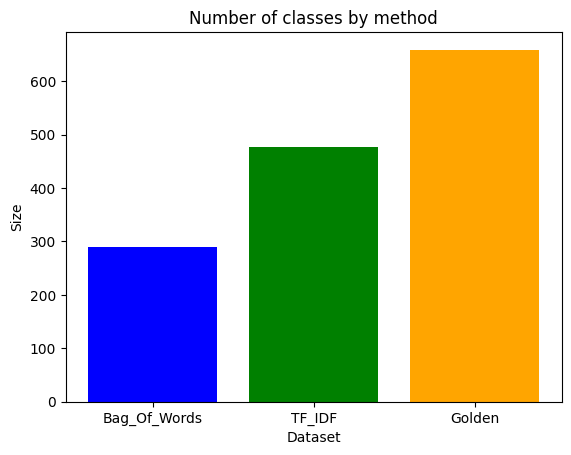

In [39]:
import matplotlib.pyplot as plt

# Dataset names and sizes
dataset_names = ['Bag_Of_Words', 'TF_IDF', 'Golden']
dataset_sizes = [len(unique_flat_list_lda), len(unique_flat_list_tfidf), len(golden_ontology_measurements_list)]

# Define colors for each dataset
dataset_colors = ['blue', 'green', 'orange']

# Create bar chart
plt.bar(dataset_names, dataset_sizes, color=dataset_colors)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Size')
plt.title('Number of classes by method')

# Display the bar chart
plt.show()

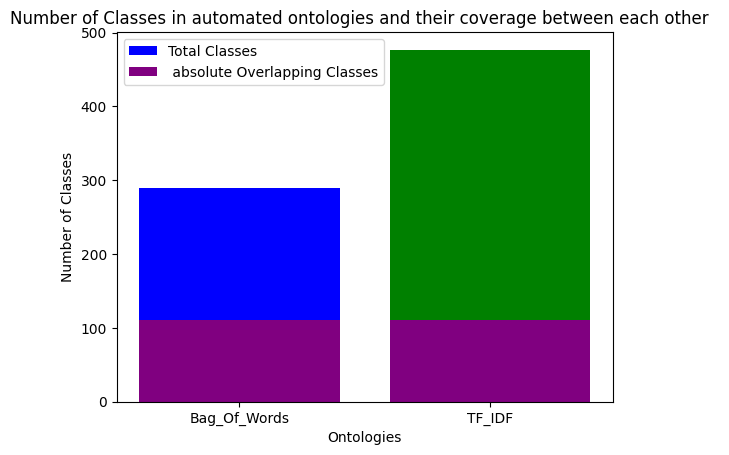

In [40]:
import matplotlib.pyplot as plt

# Total number of classes
total_classes = [len(unique_flat_list_lda),len(unique_flat_list_tfidf) ]

# Number of overlapping classes
overlapping_classes = [111,111]

# Dataset names
dataset_names = ['Bag_Of_Words', 'TF_IDF']


# Define colors for each dataset
dataset_colors = ['blue', 'green']

# Create bar chart for total classes
plt.bar(dataset_names, total_classes, color=dataset_colors, label='Total Classes')

# Create bar chart for overlapping classes
plt.bar(dataset_names, overlapping_classes, color='purple', label=' absolute Overlapping Classes')

# Add labels and title
plt.xlabel('Ontologies')
plt.ylabel('Number of Classes')
plt.title('Number of Classes in automated ontologies and their coverage between each other  ')



# Add legend
plt.legend()



# Display the bar chart
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


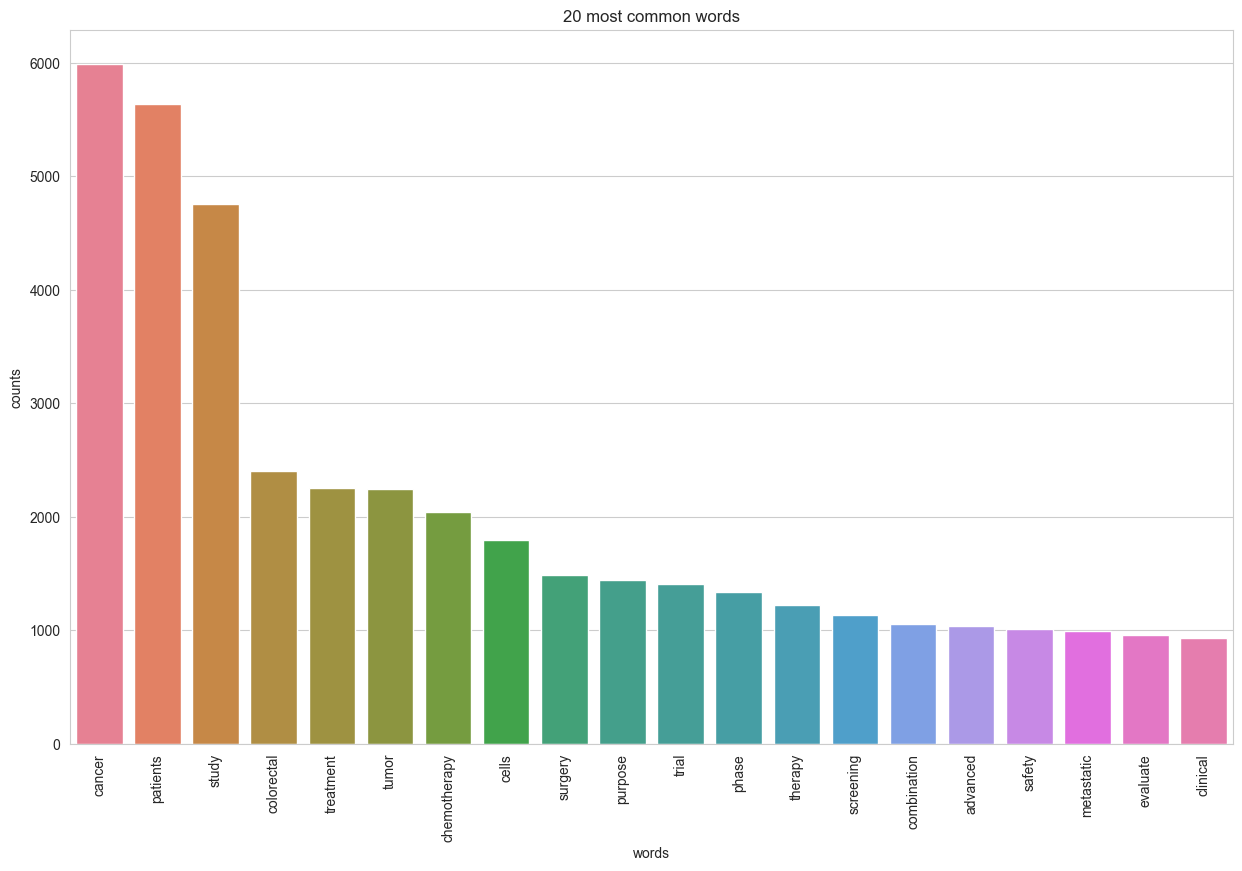

In [41]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
summary_data = count_vectorizer.fit_transform(papers2['Summary'])


# Visualise the 10 most common words
plot_20_most_common_words(summary_data, count_vectorizer)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


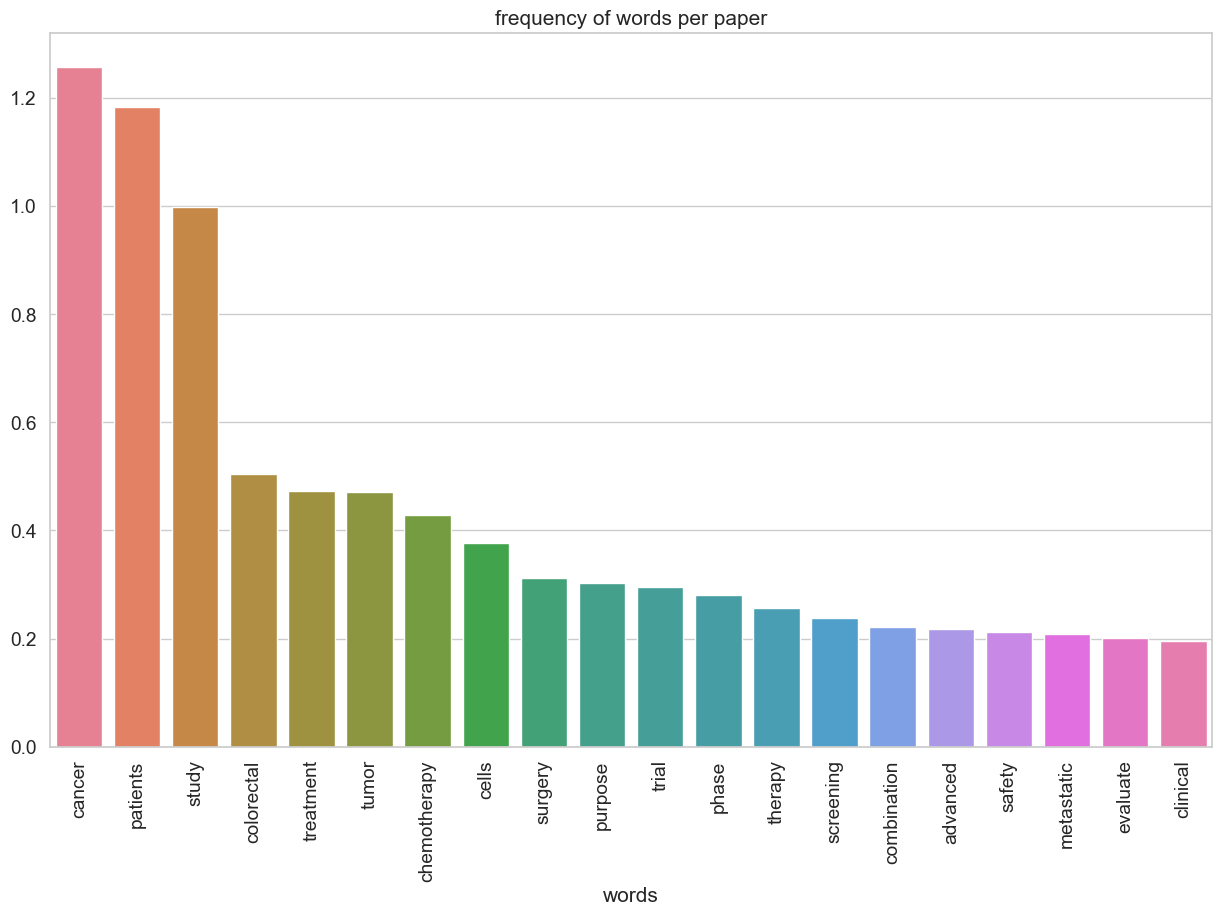

In [42]:
def plot_20_most_common_words_avg2(count_data, count_vectorizer, total_papers):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    # calculate average counts
    avg_counts = total_counts/total_papers
    
    count_dict = (zip(words, avg_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='frequency of words per paper')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    #plt.ylabel('average counts per paper')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
summary_data = count_vectorizer.fit_transform(papers2['Summary'])

# Total number of papers
total_papers = 4763

# Visualise the 10 most common words
plot_20_most_common_words_avg2(summary_data, count_vectorizer, total_papers)
